# Usage GraphGenerator

In [28]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib


from sklearn.decomposition import TruncatedSVD
from eden import graph
import umap

import numpy as np

from embedder import Embedder
from embedder import Model
from evaluator import Evaluator
from graph_generator import Graph_Generator

# Examples

number of graphs : 1000  
degree : 4  
  
graph_1 : 25 nodes  
node aphabet 10,11,12,13...  
edge aphabet 10,11,12,13...  
depth 15
  
graph_2 : 25 nodes  
node aphabet 10,11,12,13...  
edge aphabet 10,11,12,13...  
depth 15   
  


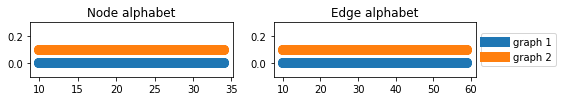

In [12]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=15,dept_g2=15,
                                 plot = True)


accuracy mean:  0.4929032258064516


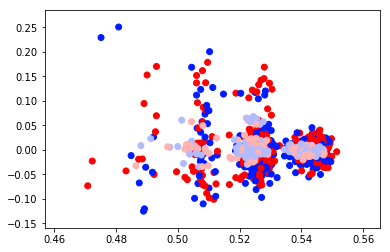

In [13]:
fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 25 nodes  
node aphabet 10,11,12,13...  
edge aphabet 10,11,12,13...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 10,11,12,13...  
edge aphabet 10,11,12,13...  
depth 1  

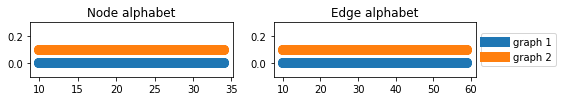

accuracy mean:  0.5175713756025213


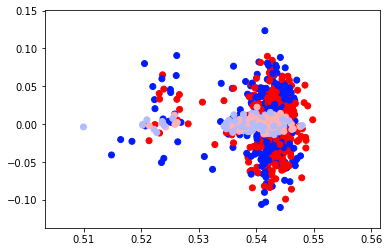

In [14]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)

fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 20 nodes  
node aphabet 10,11,12,13...  
edge aphabet 15,16,17,18...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 10,11,12,13...  
edge aphabet 10,11,12,13...  
depth 1  

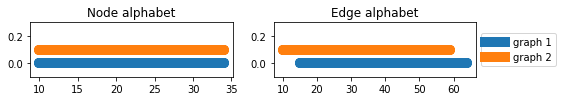

accuracy mean:  0.5402595476455321


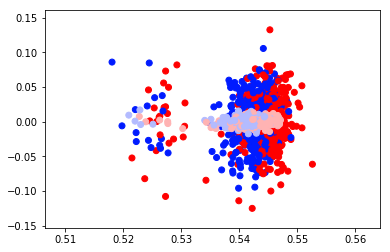

In [18]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 15)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)

fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 20 nodes  
node aphabet 10,11,12,13...  
edge aphabet 21,21,22,23...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 10,11,12,13...  
edge aphabet 10,11,12,13...  
depth 1  

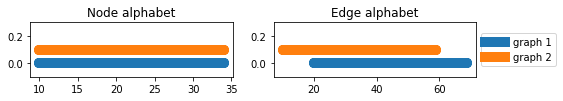

accuracy mean:  0.5699592139414162


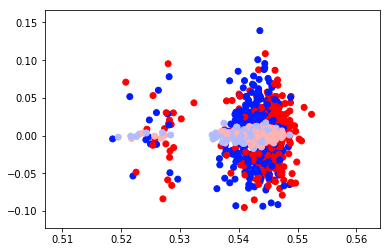

In [24]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 20)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)

fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 20 nodes  
node aphabet 10,11,12,13...  
edge aphabet 30,31,32,33...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 10,11,12,13...  
edge aphabet 10,11,12,13...  
depth 1  

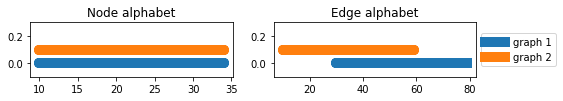

accuracy mean:  0.5701594364108268


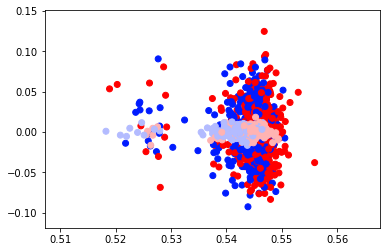

In [23]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 30)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)

fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 20 nodes  
node aphabet 10,11,12,13...  
edge aphabet 50,51,52,53...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 10,11,12,13...    
edge aphabet 10,11,12,13...  
depth 1  

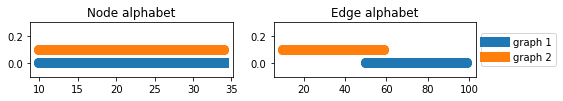

accuracy mean:  0.5830626622172784


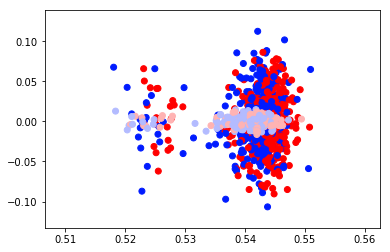

In [26]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 50)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)

fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 20 nodes  
node aphabet 11,12,13,14...  
edge aphabet 10,11,12,13...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 10,11,12,13...    
edge aphabet 10,11,12,13...  
depth 1 

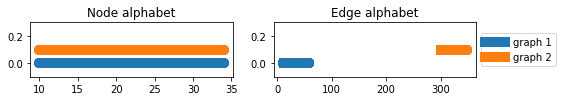

accuracy mean:  0.5602966258806082


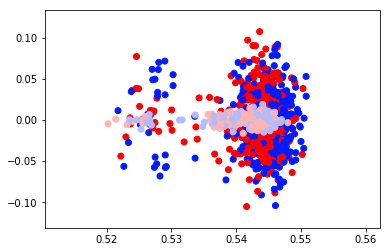

In [37]:
# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 10,
                                          edge_alph_start = 300)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)

fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 20 nodes  
node aphabet 0,1,2,..9,10  
edge aphabet 10,11,12,13...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 1,2,3...9,10    
edge aphabet 10,11,12,13...  
depth 1 

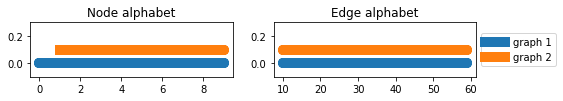

accuracy mean:  0.8173934000741566


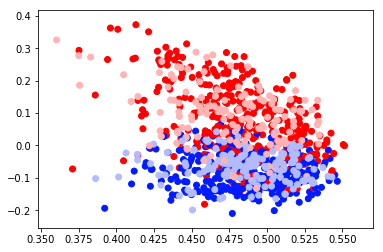

In [45]:
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 0,
                                          edge_alph_start = 10,
                                          node_alph_end = 10)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 1,
                                          edge_alph_start = 10,
                                          node_alph_end = 10)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)


fit_transfomr_plot(graphs, labels)

***  
number of graphs : 1000  
degree : 4  
  
graph_1 : 20 nodes  
node aphabet 0,1,2,..9,10  
edge aphabet 10,11,12,13...  
depth 1
  
graph_2 : 25 nodes  
node aphabet 1,2,3...10,11    
edge aphabet 10,11,12,13...  
depth 1 

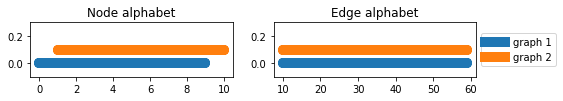

accuracy mean:  0.9531813125695215


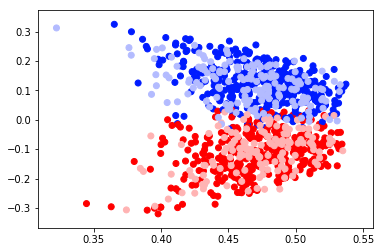

In [48]:
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 25,
                                          node_alph_start = 0,
                                          edge_alph_start = 10,
                                          node_alph_end = 10)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 25,
                                          node_alph_start = 1,
                                          edge_alph_start = 10,
                                          node_alph_end = 11)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)


fit_transfomr_plot(graphs, labels)

# Plot 10 graphs

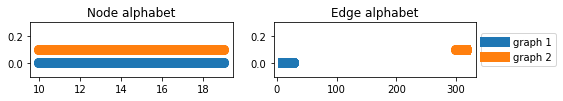

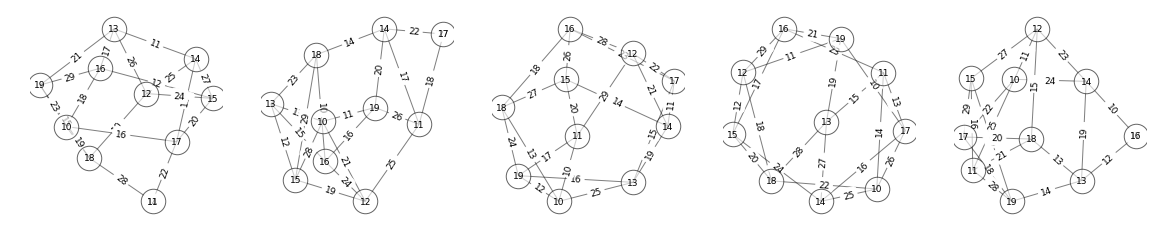

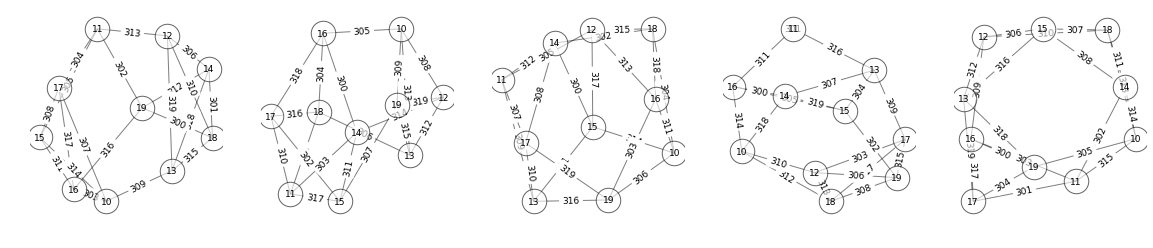

In [44]:
gen = Graph_Generator(n_graphs = 1000, degree = 4)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = 10,
                                          node_alph_start = 10,
                                          edge_alph_start = 10)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = 10,
                                          node_alph_start = 10,
                                          edge_alph_start = 300)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 dept_g1=1,dept_g2=1,
                                 plot = True)


gen.draw_graph_set(graphs,10,5)

In [ ]:
def fit_transfomr_plot(graphs, labels):

    # split the graphs and the labels
    X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                        , random_state=0)
    y_test = [[i] for i in y_test]
    y_test = np.ravel(y_test)
    y_train = [[i] for i in y_train]
    y_train = np.ravel(y_train)

    
    
    # dimension of the last embedding
    dimension_embedding = 2

    # instanziate first model
    eden = graph.Vectorizer(complexity = 2)
    model1 = Model(eden, has_fit = False)

    # instanziate second model
    pca = TruncatedSVD(n_components=dimension_embedding)
    model2 = Model(pca)


    # fit and transform
    # mode1 --> model2 --> model3
    emb = Embedder([model1,model2])
    Xd_test = emb.fit(X_train,y_train).transform(X_test)
    
    eva = Evaluator()
    a,p,r,f = eva.performance_with_kfold(Xd_test,y_test)

    print("accuracy mean: ",np.mean(a))
    colors1 = ['#FF0000','#001BFF']
    colors2 = ['#FFB3B3','#B3BBFF']

    Xd_train = emb.transform(X_train)


    plt.scatter(Xd_train[:,0],Xd_train[:,1],c=y_train, 
                cmap=matplotlib.colors.ListedColormap(colors1))
    plt.scatter(Xd_test[:,0],Xd_test[:,1],c=y_test, 
                cmap=matplotlib.colors.ListedColormap(colors2))
    plt.show()